<a href="https://colab.research.google.com/github/sofialabrab/ADA-informes/blob/main/Sub_ArregloM%C3%A1ximo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **SUB-ARREGLO MÁXIMO**

Este algoritmo tiene como objetivo encontrar la suma máxima en  los subarreglos, que estan contenidos en un arreglo unimensional.

Algunas consideraciones son que uno de los subarreglo pueden venir vacíos, de ser así, la suma de estos será: 0 y que los valores que puede tener los subarreglos son contenidos en los números racionales, es decir, puede tener números positivos, negativos o cero.

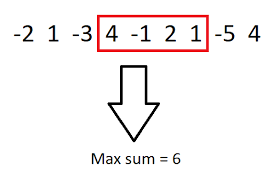

Para implementar este algoritmo, ocuparemos el método de divide y vencerás, el cual consiste en 3 pasos:
1. **Dividir:** El problema se dividirá en subproblemas, los cuales son instancias del problema original.

2. **Resolver:** Los subproblemas se van resolviendo de manera recursiva con el mismo algoritmo

3. **Combinar:** Las soluciones de los subarreglos se combinan para dar con la solución del problema original.

## **ALGORITMO SUB-ARREGLO MÁXIMO**

Para encontrar el subarreglo máximo, este algoritmo tiene 3 opciones, que este sub-arreglo este contenido en el sub-arreglo izquierdo, en el derecho o en el punto medio de estos dos.

Separaremos los pasos del algoritmo, siguiendo los pasos de divide y vencerás,

***Paso 1*: Dividir**


> El arreglo principal ira dividiendo en sub-arreglos a la mitad.

***Paso 2*: Resolver**


> Mientras no encontramos el caso base, los tres sub-arreglos, el izquierdo, el derecho y el de la mitad se van llamando recursivamente.

***Paso 3*: Combinar**


> En el "return" combinamos los tres sub-arreglos obtenidos y retornamos el mayor de este.

**EJEMPLO**



Para demostrar como funciona el algoritmo ocuparemos el siguiente ejemplo:
arreglo = [98, -1, 90, -61, -47, -50, -17, 76]




> Vamos a dividir el arreglo original en sub arreglos, es decir, 
tendremos el primer subarreglo izquierdo contenido por: [98, -1, 90, -61]   y el subarreglo derecho = [ -47, -50, -17, 76] y asi se iran dividiendo sucesivamente hasta encontrar el caso base,el cual será que el arreglo contenga un solo elemento.



> En cada iteración se irá retornando la suma máxima encontrda hasta terminar las iteraciones, donde finalmente se retornará, la suma máxima final, el sub-arreglo que la contiene y los indices de las posiciones de inicio y fin de este sub-arreglo






In [81]:
def maxArrMitad(arreglo, mitad ,indices):
  suma = 0
  maxIzq = -10000
  ind_izq = mitad - 1
  ind_der = len(arreglo)

  for i in range(mitad-1, ind_izq-1, -1):
      suma += arreglo[i]
      if(suma > maxIzq):
        maxIzq = suma
        indices[0] = i
  suma = 0
  maxDer = -10000
  for i in range(mitad,  ind_der):
      suma += arreglo[i]
      if(suma > maxDer):
        maxDer = suma
        indices[1] = i

  return max(maxIzq, maxDer),indices

def maxArray(arreglo,indices,cont, verbose,):

  indices[0] = - 1
  indices[1] = - 1
  
  if indices[0] == -1 and indices[1] == -1:
    indices[0] = 0;
    indices[1] = len(arreglo);

  #--caso base
  if(len(arreglo) == 1):
    return arreglo[0],indices

  left = indices[0];
  right = indices[1] ;

  #--Contador de pasadas

  cont[0]+=1

  #--División y asignaciones

  mitad = (indices[0] + indices[1]) // 2

  if(verbose == False):
    arrIzq = arreglo[left:mitad]
    arrDer = arreglo[mitad:right]
  else:
    print("Pasada : ", cont[0])
    arrIzq = arreglo[:mitad]
    print("Sub-arreglo Izquierdo: ", arrIzq)
    arrDer = arreglo[mitad:]
    print("Sub-arreglo Derecho: ", arrDer, "\n")

  #--Casos Recursividad

  subArrIzq, indices = maxArray(arrIzq, indices, cont, verbose)
  subArrDer, indices = maxArray(arrDer, indices, cont, verbose)  
  subArrMitad, indices = maxArrMitad(arreglo, mitad, indices)

  suma_total = max(subArrIzq,subArrDer, subArrMitad)

  if suma_total == subArrMitad:
      return subArrMitad,indices
  elif suma_total == subArrDer:
      return subArrDer,indices
  elif suma_total == subArrIzq:
      return subArrIzq,indices

arreglo = [98, -1, 90, -61, -47, -50, -17, 76]
print("Arreglo original: ", arreglo)
#indices[0] = inicio indices[1] = fin
indices = [0,0]
cont = [0]
subArrMax,indices = maxArray(arreglo,indices,cont, verbose = False)
print("Suma máxima : ", subArrMax)
print("Sub-Arreglo máximo : ", arreglo[indices[0] : indices[1] + 1])
print("--Indices de el arreglo--")
print("Indice comienzo: ", indices[0])
print("Indice fin: ", indices[1])

Arreglo original:  [98, -1, 90, -61, -47, -50, -17, 76]
Suma máxima :  98
Sub-Arreglo máximo :  [-61, -47, -50, -17, 76]
--Indices de el arreglo--
Indice comienzo:  3
Indice fin:  7


### **PASO A PASO EN LOS SUB-ARREGLOS**

En esta sección podremos ver los sub-arreglos que se van formando hasta llegar al caso base, cuando el arreglo contiene solo un elemento, al tener en el arreglo izquierdo y derecho solo un elemento, retorna la suma máxima entre estos dos y asi sucesivamente hasta terminar las llamadas recursivas. 

Tambien se muestra la cantidad de llamadas recursivas que contiene este arreglo.

In [77]:
arreglo = [98, -1, 90, -61, -47, -50, -17, 76]
#indices[0] = inicio indices[1] = fin
indices = [0,0]
cont = [0]
subArrMax = maxArray(arreglo,indices,cont, verbose = True)

Pasada :  1
Sub-arreglo Izquierdo:  [98, -1, 90, -61]
Sub-arreglo Derecho:  [-47, -50, -17, 76] 

Pasada :  2
Sub-arreglo Izquierdo:  [98, -1]
Sub-arreglo Derecho:  [90, -61] 

Pasada :  3
Sub-arreglo Izquierdo:  [98]
Sub-arreglo Derecho:  [-1] 

Pasada :  4
Sub-arreglo Izquierdo:  [90]
Sub-arreglo Derecho:  [-61] 

Pasada :  5
Sub-arreglo Izquierdo:  [-47, -50]
Sub-arreglo Derecho:  [-17, 76] 

Pasada :  6
Sub-arreglo Izquierdo:  [-47]
Sub-arreglo Derecho:  [-50] 

Pasada :  7
Sub-arreglo Izquierdo:  [-17]
Sub-arreglo Derecho:  [76] 



## **TIEMPO DE EJECUCIÓN**
**TEOREMA DEL TIEMPO DE EJECUCIÓN**

El tiempo de ejecución del algoritmo que resuelve el máximo subarreglo es el mismo tanto para el mejor como para el peor caso, debido que en ambas ocasiones, este ocupa el método de divide y vencerás, la cual va diviendo el arreglo original en subarreglos hasta llegar al caso base y comenzar a revolver las recursiones hasta el final, para poder tener el objetivo esperado, en este caso, la suma maxima del subarreglo.

El tiempo de ejecución es: **O(n log n)**

**Comprobación:**


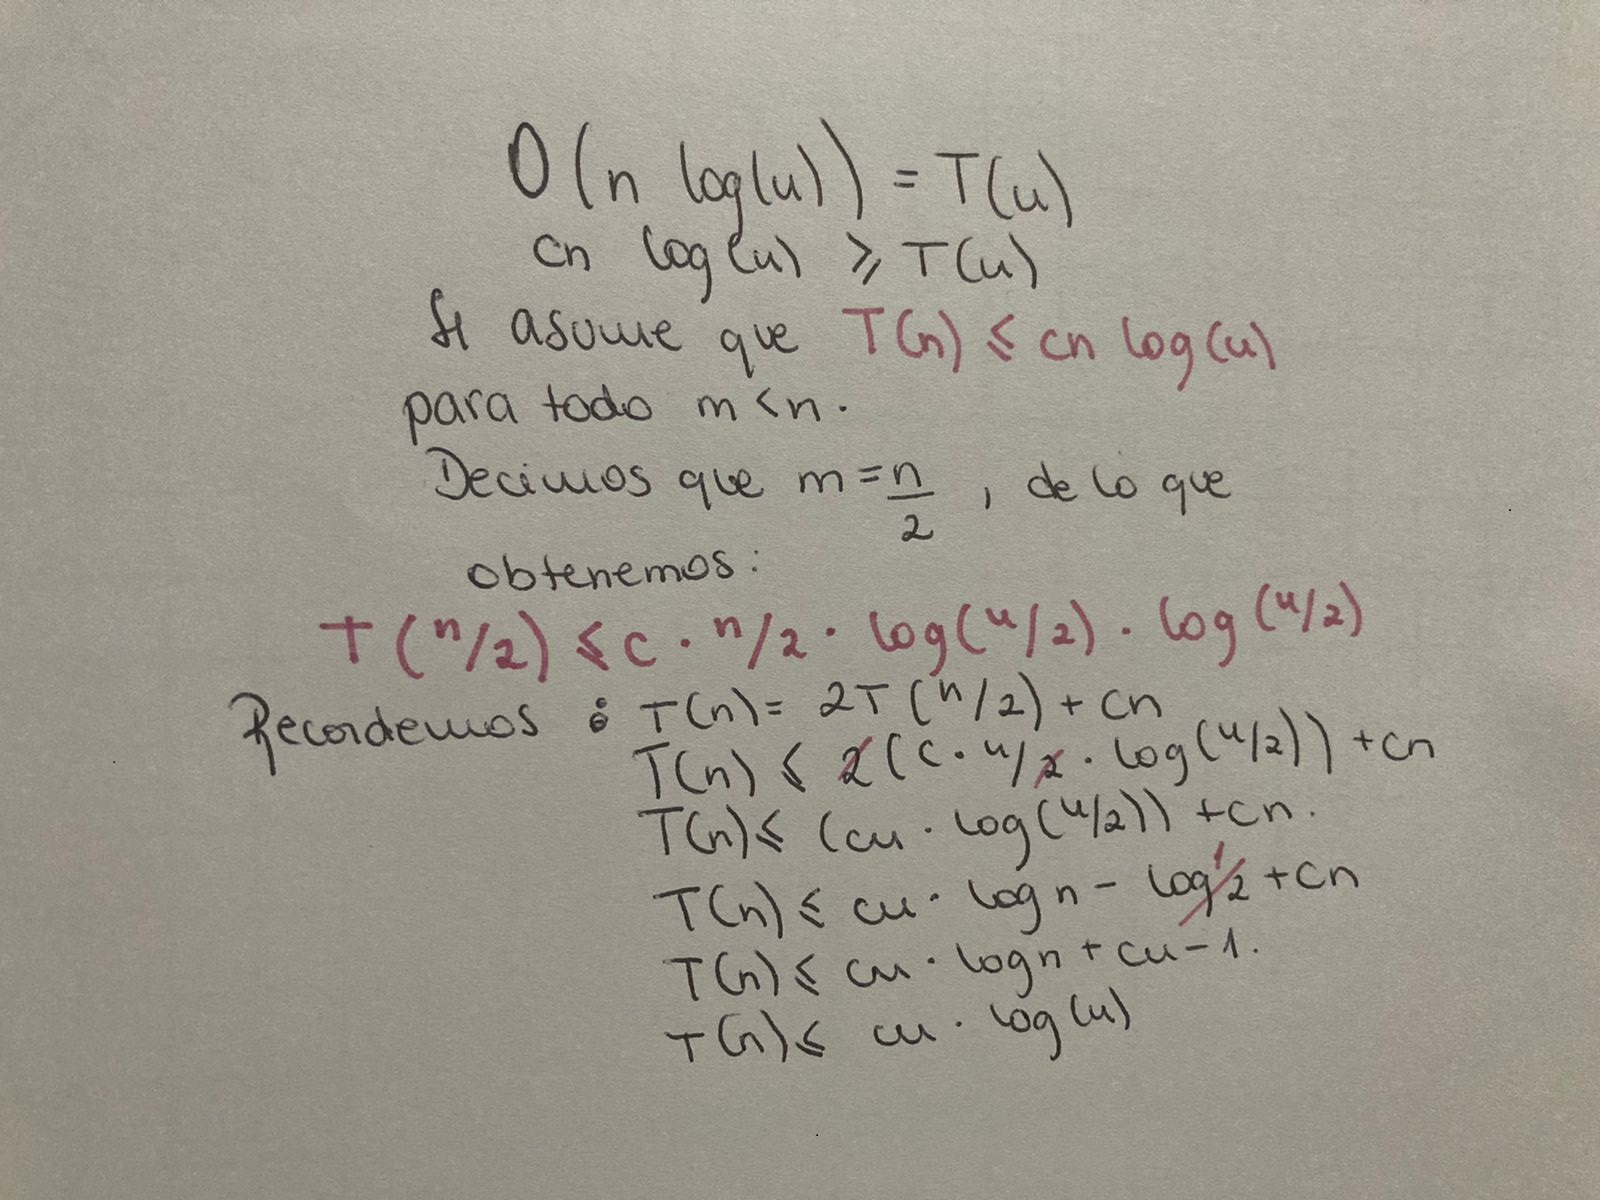

## **CORRECTITUD**

**FUNCIÓN MaxArrMitad**

***Propiedad Invariante:***
Al inicio de cada iteracion nuestras variables que contengan la maxima suma izquierda y derecha contendran la máxima suma de cada sub-arreglo.

> ***Inicialización***: 

En el comienzo de la iteración las varibles  maxIzq y maxDer tienen un valor inicial de -10000, dado que aun no se ha revisado ningún elemento de los sub-arreglos, es por esto que se asume que al comienzo contienen la máxima suma posible.

> ***Mantención***:

Durante la iteracion solo en el caso en el que el valor de las variables maxIzq y maxDer sea menor al valor de la variable suma se actualizan estas variables, por ende en la iteracion i , siempre tendre guardada la mayor suma desde[mitad, -1] en el caso que sea el sub-arreglo izquierdo o [i, mitad] si es el sub-arreglo derecho.

Para finalizar, se retorna la máxima suma entre las 3 que se obtuvieron, la de el sub-arreglo Izquierdo, el sub-arreglo Derecho y el sub-arreglo que pasa por la mitad.


**FUNCIÓN maxArray**: En esta función contamos con dos casos, los cuales serán el caso base y el caso de recursividad.
***Propiedad Invariante:*** El arreglo se seguirá subdiviendo, mientras no se encuentre el caso base.


> ***Caso Base***: len(arreglo) == 1

En este caso al tener solo un elemento en nuestro arreglo, este mismo sería la respuesta, es decir, su suma máxima.

> ***Caso Recursividad***: len(arreglo) > 1

Mientras no se encuentre el caso base, nuestra función maxArray se llama recursivamente junto con la función maxArrMitad.




# **EXPERIMENTOS**



**GRÁFICO TIEMPO DE EJECUCUCIÓN:**

  En este gráfico, compararemos el tiempo de ejecución de dos métodos para calcular el sub-arreglo máximo.

In [ ]:
def kadane(A):
 
    # encontrar el máximo elemento presente en una lista dada
    maximum = max(A)
 
    # si la lista contiene todos los valores negativos, devolver el elemento máximo
    if maximum < 0:
        return maximum
 
    # almacena la sublista de suma máxima encontrada hasta el momento
    max_so_far = 0
 
    # almacena la suma máxima de la sublista que termina en la posición actual
    max_ending_here = 0
 
    # do para cada elemento de una lista dada
    for i in A:
 
        # actualice la suma máxima de la sublista "finalizando" en el índice `i` (agregando el
        # elemento actual a la suma máxima que termina en el índice anterior `i-1`)
        max_ending_here = max_ending_here + i
 
        # si la suma máxima es negativa, configúrelo en 0 (lo que representa
        # una sublista vacía)
        max_ending_here = max(max_ending_here, 0)
 
        # actualiza el resultado si se encuentra que la suma de la sublista actual es mayor
        max_so_far = max(max_so_far, max_ending_here)
 
    return max_so_far
A = [-8, -3, -6, -2, -5, -4]

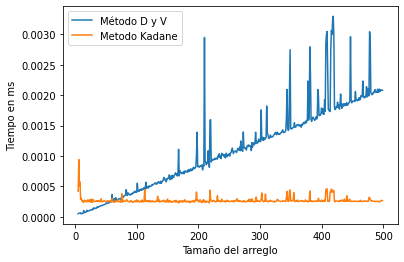

In [78]:
import matplotlib.pyplot as plt
import datetime
from timeit import repeat
import random
from termcolor import colored
import copy


x=[]; y=[]
y1=[]

for n in range(5,500):

  a = random.sample(range(1, 1000), n)
  cont = [0,0]
  verbose = False
  #la función repeat está ejecutando 20 veces insertion_Sort con el arreglo a y retorna el mejor tiepo obtenido.
  t1 = repeat(setup="from __main__ import kadane", stmt=f"kadane({a})", repeat=1, number=10)
  t2 = repeat(setup="from __main__ import maxArray", stmt=f"maxArray({arreglo},{indices},{cont},{verbose})", repeat=1, number=10)
  x.append(n)
  y.append(t1)
  y1.append(t2)


plt.plot(x, y)
plt.plot(x, y1)
plt.legend(["Método D y V", "Metodo Kadane"])

plt.xlabel('Tamaño del arreglo')
plt.ylabel('Tiempo en ms')
plt.show()

**RESULTADO:** Mediante el gráfico podemos ver que en relación al tiempo de ejecución, el ** método Kadane** es mas óptimo para calcular el sub-arreglo máximo dentro de un arreglo, debido que su tiempo de ejecución es lineal : **O(n)**. A comparación de el **método divide y vencerás**, dado que tanto como para el mejor como para el peor caso siempre el algoritmo realiza la misma cantidad de operaciones, por lo que su tiempo de ejecución es **O(n log n)**

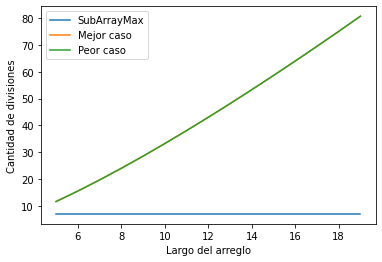

In [79]:
import random
from itertools import count
import matplotlib.pyplot as plt 
from math import log2

x=[n for n in range(5,20)] 
y1=[n*log2(n) for n in range(5,20)] # mejor caso
y2=[n*log2(n) for n in range(5,20)] # peor caso
y=[]; 
verbose = False
for n in range(5,20):
  cont = [0,0]
  a = random.sample(range(1, 100), n)
  maxArray(arreglo,indices,cont, verbose = False)
  y.append(cont[0])

plt.plot(x,y)
plt.plot(x,y1)
plt.plot(x,y2)
plt.legend(["SubArrayMax", "Mejor caso", "Peor caso "])

plt.xlabel('Largo del arreglo')
plt.ylabel('Cantidad de divisiones')
plt.show()

**RESULTADO:**
El resultado del gráfico, no es lo esperado, debido que las 3 líneas deberian estar en la misma posición, dado que la cantidad de divisiones de el arreglo original, deberían ser las mismas para el peor y el mejor caso. Que el resultado no sea el esperado, se debe a que el código que calcula la suma máxima no esta funcionando correctamente.
